In [49]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
%matplotlib inline 

In [388]:
RW_data = pd.read_excel('D:\pythonprac\RidingMowers.xlsx')

In [389]:
os.chdir("D:\pythonprac")

In [390]:
data_clean = pd.get_dummies(RW_data['Ownership'])
data_clean = pd.concat([RW_data, data_clean], axis=1)

In [391]:
data_clean.head(50)

,Income,Lot_Size,Ownership,non-owner,owner
0,51.0,14.0,non-owner,1,0
1,63.0,14.8,non-owner,1,0
2,59.4,16.0,non-owner,1,0
3,47.4,16.4,non-owner,1,0
4,85.5,16.8,owner,0,1
5,64.8,17.2,non-owner,1,0
6,108.0,17.6,owner,0,1
7,84.0,17.6,non-owner,1,0
8,49.2,17.6,non-owner,1,0
9,60.0,18.4,owner,0,1


In [392]:
data_clean.dtypes

Income       float64
Lot_Size     float64
Ownership     object
non-owner      uint8
owner          uint8
dtype: object

In [393]:
data_clean.describe()

,Income,Lot_Size,non-owner,owner
count,24.000000,24.000000,24.000000,24.000000
mean,68.437500,18.950000,0.500000,0.500000
std,19.793144,2.428275,0.510754,0.510754
min,33.000000,14.000000,0.000000,0.000000
25%,52.350000,17.500000,0.000000,0.000000
50%,64.800000,19.000000,0.500000,0.500000
75%,83.100000,20.800000,1.000000,1.000000
max,110.100000,23.600000,1.000000,1.000000


In [394]:
predictors = data_clean[[ 'Income','Lot_Size']]

targets = data_clean[['owner']]

In [594]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size = 0.4)

In [595]:
pred_train




,Income,Lot_Size
6,108.0,17.6
14,69.0,20.0
21,51.0,22.0
1,63.0,14.8
7,84.0,17.6
11,33.0,18.8
17,61.5,20.8
10,66.0,18.4
13,75.0,19.6
12,110.1,19.2


In [596]:
pred_test.shape

(10, 2)

In [597]:
tar_train.shape

(14, 1)

In [598]:
tar_test.shape

(10, 1)

In [599]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(pred_train, tar_train)

In [600]:
predictions = classifier.predict(pred_test)

In [601]:
sklearn.metrics.confusion_matrix(tar_test,predictions)


array([[3, 1],
       [1, 5]])

In [602]:
sklearn.metrics.accuracy_score(tar_test, predictions)


0.80000000000000004

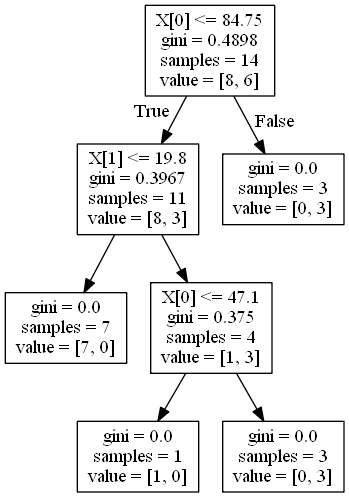

In [603]:
#Displaying the decision tree
from sklearn import tree

from io import StringIO

from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())


In [604]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [653]:
classifier2 = RandomForestClassifier(n_estimators=10)

In [654]:
y = tar_train.owner.ravel()
classifier2.fit(pred_train, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [655]:
prediction2=classifier2.predict(pred_test)

In [656]:
sklearn.metrics.confusion_matrix(tar_test,prediction2)

array([[3, 1],
       [3, 3]])

In [657]:
sklearn.metrics.accuracy_score(tar_test, prediction2)

0.59999999999999998

In [659]:
for name, importance in zip(predictors, classifier2.feature_importances_):
    print ( name, importance)

Income 0.505089031339
Lot_Size 0.494910968661


In [660]:
trees = range(10)
accuracy=np.zeros(10)

In [668]:
for idx in range(len(trees)):
    classifier2 = RandomForestClassifier(n_estimators=idx+1)
    classifier2 = classifier2.fit(pred_train,y)
    prediction2 = classifier2.predict(pred_test)
    accuracy[idx] = sklearn.metrics.accuracy_score(tar_test, prediction2)

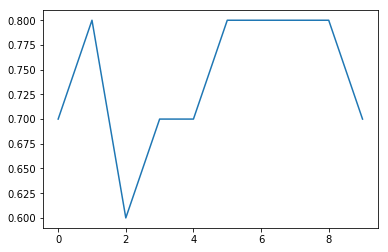

In [669]:
plt.cla()
plt.plot(trees,accuracy)